<a href="https://colab.research.google.com/github/Ni7070/MinimumErrorRateClassifier/blob/master/Minimum_Error_Rate_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test-Minimum-Error-Rate-Classifier.txt to test-Minimum-Error-Rate-Classifier.txt


In [ ]:
#Reading Train and Test data files
import numpy as np
df_train = np.loadtxt("test-Minimum-Error-Rate-Classifier.txt", dtype= float, delimiter = ",")
df=df_train

In [ ]:
#initializing sigma and mean
x=np.array([1,1])
mu1=np.array([0,0])
Sigma1=np.matrix([[.25 ,.3],[.3 ,1]])

mu2=np.array([2,2])
Sigma2=np.matrix([[.5 ,0],[0 ,.5]])

w1=np.empty(shape=[0,2])
w2=np.empty(shape=[0, 2])

In [ ]:
#Normal Distribution Formula after taking log on its both side
def normalDistribution(x,y,u,sigma,w):   
    return  -np.log(2*np.pi)-0.5*np.log(np.linalg.det(sigma))-0.5*(np.dot(np.dot(np.transpose([x,y]-u),np.linalg.inv(sigma)),([x,y]-u)))+np.log(w)

In [ ]:
#Classify samples into classes
for i in range(0,df.shape[0]):
    print(df[i,:]);
    x1 = normalDistribution(df[i,0],df[i,1], mu1, Sigma1,0.5);
    x2 = normalDistribution(df[i,0],df[i,1], mu2, Sigma2, 0.5);
    if(x1 > x2):
        w1 = np.append(w1,np.array([df[i, :]]), axis=0)
    else:
        w2 = np.append(w2, np.array([df[i, :]]), axis=0)

[1. 1.]
[ 1. -1.]
[4. 5.]
[-2.   2.5]
[0. 2.]
[ 2. -3.]


In [ ]:
print(w1)
print(w2)
class1 = np.insert(w1, 2, values=1, axis=1)
class2 = np.insert(w2, 2, values=2, axis=1)
print(class1)
print(class2)

[[ 1.  1.]
 [ 1. -1.]
 [ 0.  2.]]
[[ 4.   5. ]
 [-2.   2.5]
 [ 2.  -3. ]]
[[ 1.  1.  1.]
 [ 1. -1.  1.]
 [ 0.  2.  1.]]
[[ 4.   5.   2. ]
 [-2.   2.5  2. ]
 [ 2.  -3.   2. ]]


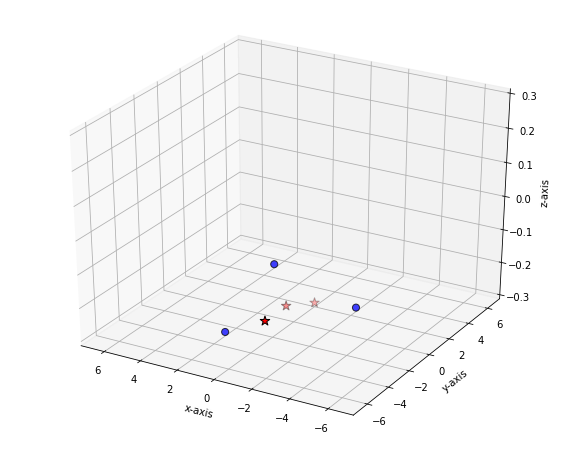

In [ ]:
#plotting 3D 
fig = plt.figure()
ax =fig.add_subplot(projection='3d')

ax.set_xlim3d(7,-7)
ax.set_ylim3d(-7,7)
ax.set_zlim3d(-0.3,0.3)

ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.set_zlabel("z-axis")


ax.scatter3D(w1[:,0],w1[:,1],[-.3,-.3,-.3], c = 'red',marker='*',label='w1', s=100,edgecolors='black')
ax.scatter3D(w2[:,0],w2[:,1],[-.3,-.3,-.3], c = 'blue',label='w2',edgecolors='black', alpha=0.75, s=50)

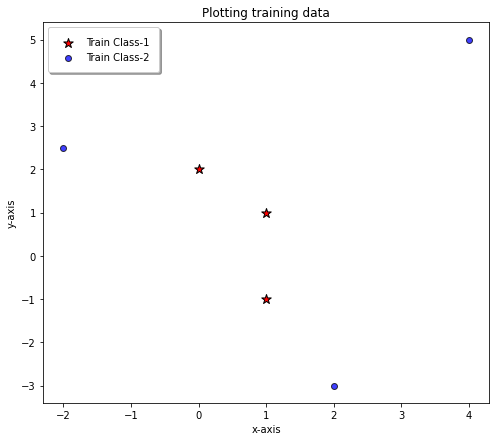

In [ ]:
#plotting 2d
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize = (8, 7))


plt.scatter(class1[:,0], class1[:,1], c = 'red', marker='*', s= 100, label='Train Class-1', edgecolors='black')
plt.scatter(class2[:,0], class2[:,1], c = 'blue', label='Train Class-2', edgecolors='black', alpha=0.75)

plt.title("Plotting training data")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
ax.legend(frameon=True, shadow=True, borderpad=1)


plt.show()


In [ ]:
#2-dimensional distribution will be over variables X and Y
N = 32
X = np.linspace(-7, 7, N)
Y = np.linspace(-7, 7, N)
X, Y = np.meshgrid(X, Y)

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y


def multivariate_gaussian(pos, mu, Sigma):
    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)
    return np.exp(-fac / 2) / N

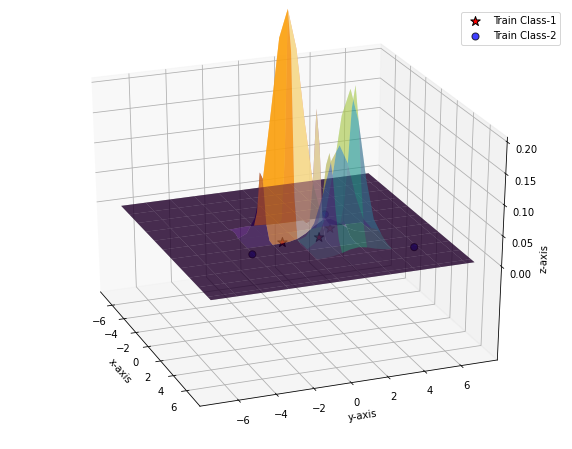

In [ ]:
#a figure which should include these points, the corresponding probability distribution function

Z1 = multivariate_gaussian(pos, mu1, Sigma1)
Z2 = multivariate_gaussian(pos, mu2, Sigma2)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(class1[:,0], class1[:,1], c = 'red', marker='*', s= 100, label='Train Class-1', edgecolors='black')
ax.scatter(class2[:,0], class2[:,1], c = 'blue', label='Train Class-2', edgecolors='black', alpha=0.75, s=50)

ax.plot_surface(X, Y, Z1, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.inferno, alpha= .7)
ax.plot_surface(X, Y, Z2, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis, alpha= .4)

ax.legend()

ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.set_zlabel("z-axis")

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)
plt.rcParams["figure.figsize"] = (10,8)
plt.show()

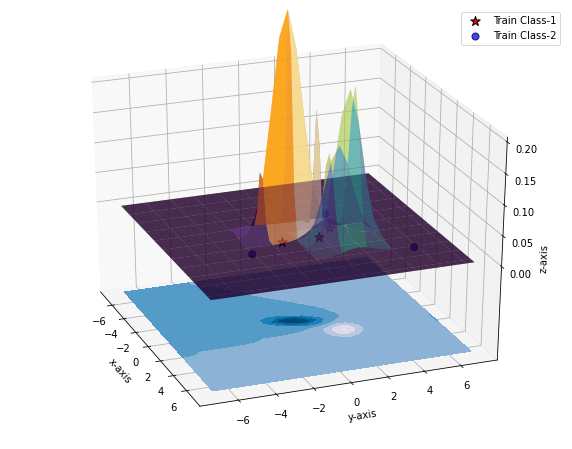

In [ ]:
#Along with decesion boundary
fig = plt.figure()
ax = fig.gca(projection='3d')


ax.scatter(class1[:,0], class1[:,1], c = 'red', marker='*', s= 100, label='Train Class-1', edgecolors='black')
ax.scatter(class2[:,0], class2[:,1], c = 'blue', label='Train Class-2', edgecolors='black', alpha=0.75, s=50)

ax.plot_surface(X, Y, Z1, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.inferno, alpha= .7)
ax.plot_surface(X, Y, Z2, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis, alpha= .4)

#Decesion Boundary
decesionBoundary = Z1-Z2
ax.contourf(X, Y, decesionBoundary, zdir='z', offset=-0.15, cmap=cm.PuBu )

ax.legend()

ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.set_zlabel("z-axis")

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)
plt.rcParams["figure.figsize"] = (10,8)
plt.show()